In [1]:
# Datasets
# UN World Happiness Report 2018 data in Excel: https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=12&ved=2ahUKEwjJ7P3byYbfAhWMkSwKHRl_AzkQFjALegQIBBAC&url=https%3A%2F%2Fs3.amazonaws.com%2Fhappiness-report%2F2018%2FWHR2018Chapter2OnlineData.xls&usg=AOvVaw2XNOTIXL3PFaRHkPXI19LG
# UN Sustainable Development Goals Index data in Excel: http://www.sdgindex.org/reports/2018/
#
# Research question for assignment: Plot results of the subjective happiness score by country from WHR2018 against the multifactor measurable public policy goals and state from SDG Index 2018.
# Explore, if the sustainable development goals agreed at UN seem to correlate with subjective feeling of happiness by citizens.
# Note: This is an exercise, not a deep dive. Correlations may be superficial and require further study into factors.
#
# Improve visualization to make insight instantly understandable.

<Figure size 1152x864 with 0 Axes>

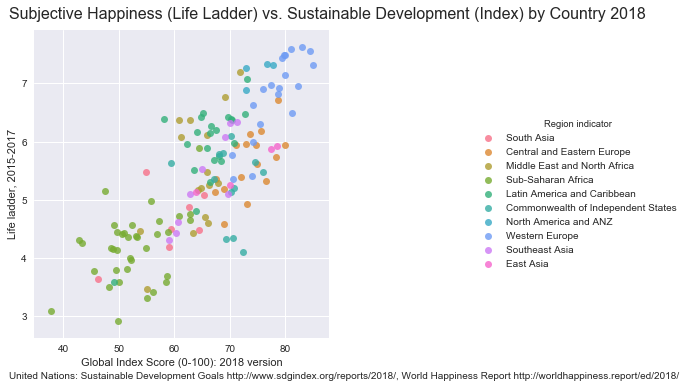

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

# read datasets

# columns of interest 'country', 'year' (2018), 'Life Ladder' (0-10)
whr_df = pd.read_excel('WHR2018Chapter2OnlineData.xls', sheet_name='SupportingFactors', usecols = 'A,B,C')

# columns of interest 'country', 'Global Index Score (0-100): 2018 version'
sdg_df = pd.read_excel('SDG_Global_Index_Data_2018.xlsx', usecols='A,C') #,HU:IK')

# align country names, SDG has more countries than WHR, so go with WHR countries
sdg_df['country'] = sdg_df['country'].replace('Congo, Dem. Rep.', 'Congo (Kinshasa)')
sdg_df['country'] = sdg_df['country'].replace('Congo, Rep.', 'Congo (Brazzaville)')
sdg_df['country'] = sdg_df['country'].replace('Egypt, Arab Rep.', 'Egypt')
sdg_df['country'] = sdg_df['country'].replace('Iran, Islamic Rep.', 'Iran')
sdg_df['country'] = sdg_df['country'].replace('Kyrgyz Republic', 'Kyrgyzstan')
sdg_df['country'] = sdg_df['country'].replace('Lao PDR', 'Laos')
sdg_df['country'] = sdg_df['country'].replace('Former Yugoslav Republic of Macedonia (FYROM)', 'Macedonia')
sdg_df['country'] = sdg_df['country'].replace('Russian Federation', 'Russia')
sdg_df['country'] = sdg_df['country'].replace('Slovak Republic', 'Slovakia')
sdg_df['country'] = sdg_df['country'].replace('Korea, Rep.', 'South Korea')
sdg_df['country'] = sdg_df['country'].replace('Syrian Arab Republic', 'Syria')
sdg_df['country'] = sdg_df['country'].replace('Venezuela, RB', 'Venezuela')

# 'Hong Kong S.A.R. of China', 'Ivory Coast', 'Kosovo', North Korea, North Cyprus, Palestinian Territories, Taiwan, Yemen missing from SDG
  

# merge datasets
m_df = pd.merge(whr_df, sdg_df, how='inner', left_on='country', right_on='country')
m_df = m_df.dropna()
#m_df

# create various plots for exploration

plt.style.use('seaborn')
fig = plt.figure(figsize=(16, 12), edgecolor='w')

#sns.set_style('white')
#sns.pairplot(m_df, hue='Region indicator', diag_kind='auto', height = 20, size=2)  
#sns.swarmplot('Region indicator', 'Life ladder, 2015-2017', data = m_df, size=10)
#sns.swarmplot('Region indicator', 'Global Index Score (0-100): 2018 version', data = m_df, size=10, height=5)
#sns.jointplot('Global Index Score (0-100): 2018 version','Life ladder, 2015-2017', data=m_df, kind='kde', space=0)
#ax1 = m_df.plot.scatter(x='Global Index Score (0-100): 2018 version',y='Life ladder, 2015-2017',c='DarkBlue')

# final plot for assignment
g = sns.lmplot(x='Global Index Score (0-100): 2018 version',y='Life ladder, 2015-2017', data=m_df, fit_reg=False, hue='Region indicator', height=5)
g.fig.text(0.06, 1, 'Subjective Happiness (Life Ladder) vs. Sustainable Development (Index) by Country 2018', fontsize=16)
g.fig.text(0.06, 0, 'United Nations: Sustainable Development Goals http://www.sdgindex.org/reports/2018/, World Happiness Report http://worldhappiness.report/ed/2018/', fontsize=10)

# now let's try maps
#fig = plt.figure(figsize=(16, 12), edgecolor='w')
#m = Basemap(projection='moll', resolution=None, lat_0=0, lon_0=0)
#draw_map(m)

# Initialize the map
#map = Basemap(llcrnrlon=-160, llcrnrlat=-60,urcrnrlon=160,urcrnrlat=70)
 
# Continent and countries!
#map.drawmapboundary(fill_color='#A6CAE0')
#map.fillcontinents(color='#e6b800',lake_color='#e6b800')
#map.drawcountries(color="white")
#plt.show()


plt.savefig("Happiness vs Sustainable Development 2018 - web.png", bbox_inches="tight")


